# 현대 ai challenge

## EDA & 전처리

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [102]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sample_submission = pd.read_csv('./sample_submission.csv')

In [66]:
train.head()

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
0,TRAIN_000000,SG,GIW5,Container,30.881018,2018-12-17 21:29,Z618338,30.0,24,24300,...,180.0,CQSB78,Panama,NaN,NaN,NaN,NaN,5,0.002615,3.450000
1,TRAIN_000001,IN,UJM2,Bulk,0.000000,2014-09-23 6:59,X886125,30.0,13,35900,...,180.0,SPNO34,Marshall Islands,NaN,NaN,NaN,NaN,12,0.000217,0.000000
2,TRAIN_000002,CN,EUC8,Container,0.000000,2015-02-03 22:00,T674582,50.0,12,146000,...,370.0,FNPK22,Malta,NaN,NaN,NaN,NaN,6,0.001614,0.000000
3,TRAIN_000003,JP,ZAG4,Container,0.000000,2020-01-17 4:02,Y847238,20.0,18,6910,...,120.0,PBZV77,Bahamas,-3.18,-1.61,6.7,2.629350,13,0.000356,0.000000
4,TRAIN_000004,SG,GIW5,Container,27.037650,2020-01-26 7:51,A872328,50.0,10,116000,...,300.0,GUCE76,Liberia,-0.33,-3.28,25.6,2.495953,15,0.002615,253.554444


In [5]:
train.columns

Index(['SAMPLE_ID', 'ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'DIST', 'ATA',
       'ID', 'BREADTH', 'BUILT', 'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT',
       'LENGTH', 'SHIPMANAGER', 'FLAG', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE',
       'BN', 'ATA_LT', 'PORT_SIZE', 'CI_HOUR'],
      dtype='object')

In [12]:
train['ID'].value_counts()

ID
E231315    776
J182342    510
X345112    502
W358545    501
T184327    494
          ... 
R135732      1
X314626      1
P364751      1
K764142      1
D222868      1
Name: count, Length: 25028, dtype: int64

In [11]:
train['SHIPMANAGER'].value_counts()

SHIPMANAGER
PSPJ35    6398
QZFV66    5944
TUZU25    5596
TQXV21    5309
KQMD74    5077
          ... 
UELB43       1
TNZK12       1
HAOA74       1
VAIS15       1
JILK27       1
Name: count, Length: 6566, dtype: int64

In [13]:
train['BN']

0              NaN
1              NaN
2              NaN
3         2.629350
4         2.495953
            ...   
391934         NaN
391935    1.253491
391936    4.766257
391937         NaN
391938         NaN
Name: BN, Length: 391939, dtype: float64

### 결측치

In [14]:
train.isnull().sum() # 391939 데이터 중 163688개 가량 결측치가 존재함.

SAMPLE_ID                  0
ARI_CO                     0
ARI_PO                     0
SHIP_TYPE_CATEGORY         0
DIST                       0
ATA                        0
ID                         0
BREADTH                    1
BUILT                      0
DEADWEIGHT                 0
DEPTH                      1
DRAUGHT                    1
GT                         0
LENGTH                     1
SHIPMANAGER                0
FLAG                       0
U_WIND                163688
V_WIND                163688
AIR_TEMPERATURE       164630
BN                    163688
ATA_LT                     0
PORT_SIZE                  0
CI_HOUR                    0
dtype: int64

In [ ]:
train['U_WIND']

C:\Users\flt.DESKTOP-I2KQP96\AppData\Local\Temp\ipykernel_14440\3146580038.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column_name], shade=True)


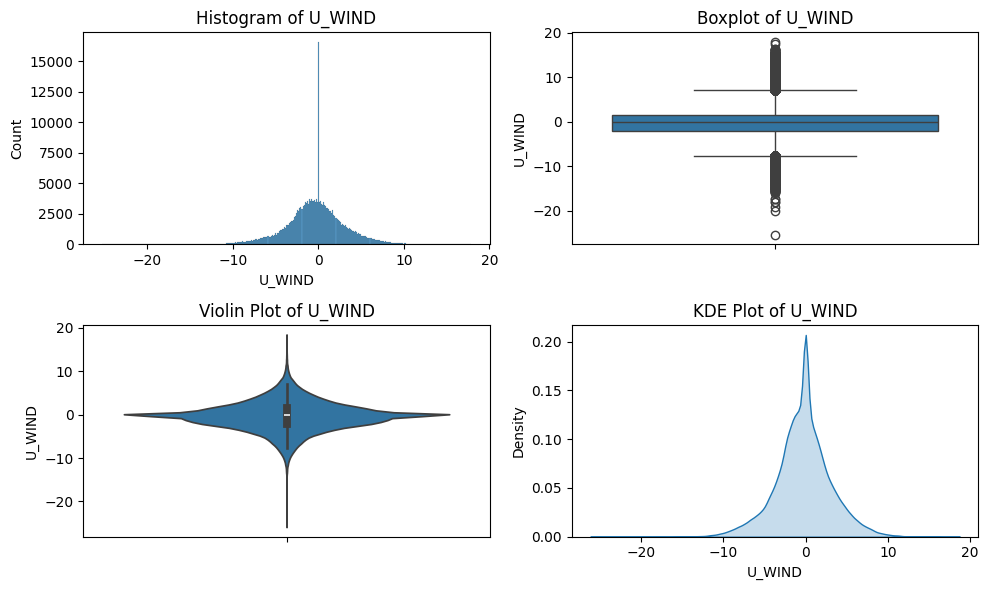

C:\Users\flt.DESKTOP-I2KQP96\AppData\Local\Temp\ipykernel_14440\3146580038.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column_name], shade=True)


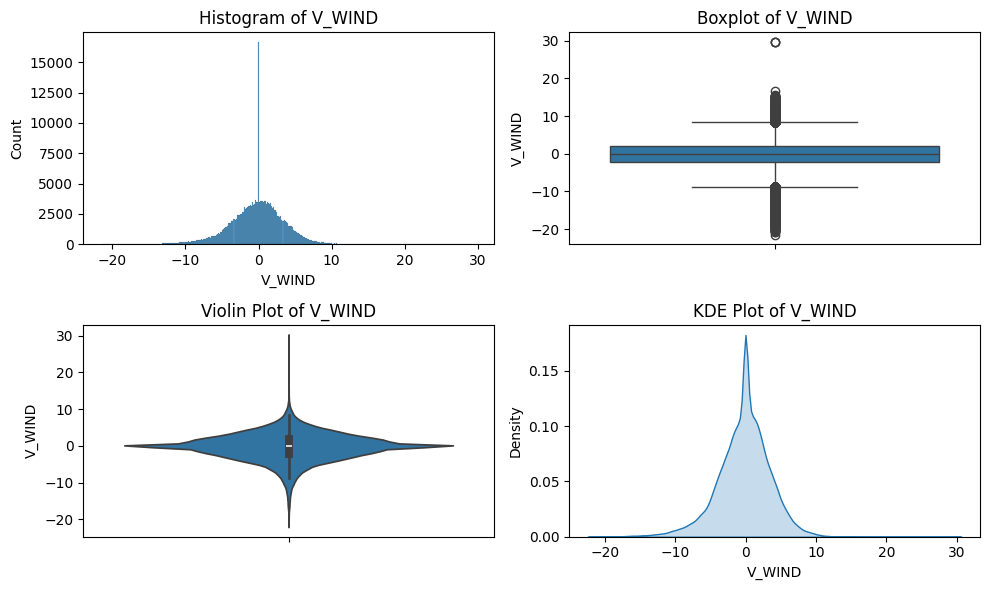

C:\Users\flt.DESKTOP-I2KQP96\AppData\Local\Temp\ipykernel_14440\3146580038.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column_name], shade=True)


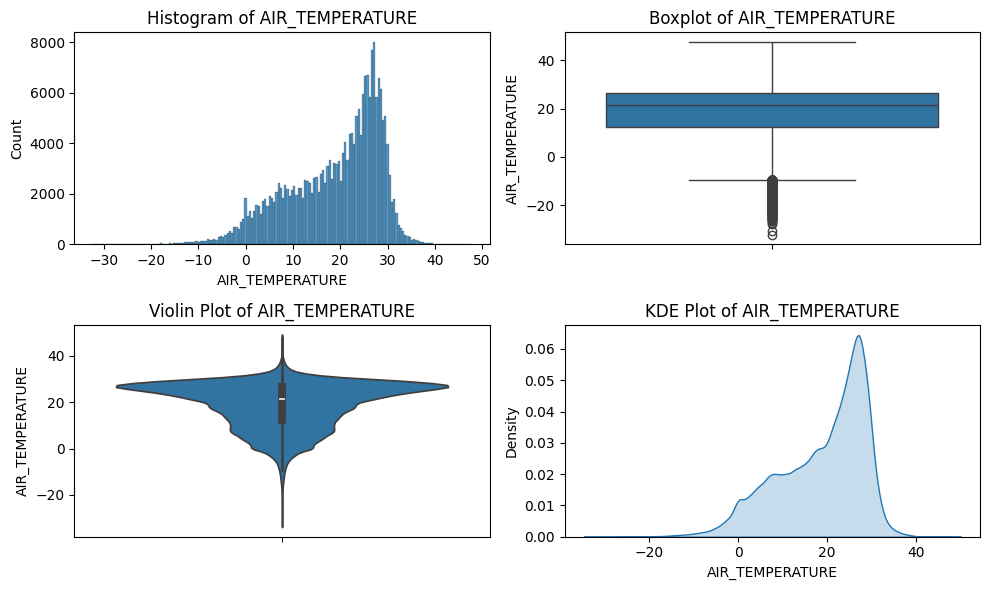

C:\Users\flt.DESKTOP-I2KQP96\AppData\Local\Temp\ipykernel_14440\3146580038.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column_name], shade=True)


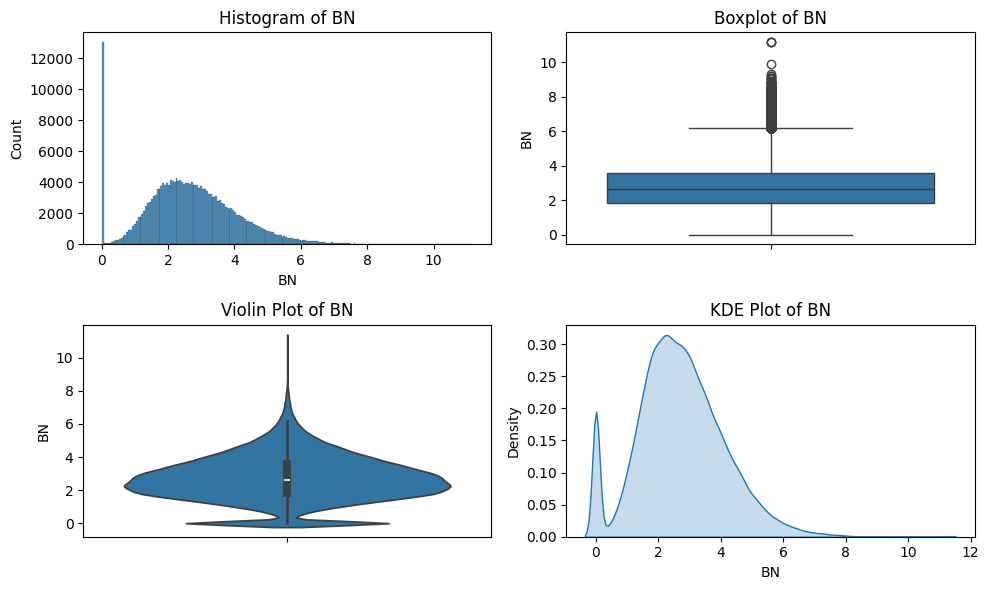

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_u_wind(data, column_name):
    """
    'U_WIND' 열에 대한 다양한 그래프를 그리는 함수입니다.
    :param data: DataFrame 객체.
    :param column_name: 그래프를 그릴 열의 이름.
    """

    plt.figure(figsize=(10, 6))

    # 히스토그램
    plt.subplot(2, 2, 1)
    sns.histplot(data[column_name], kde=False)
    plt.title('Histogram of ' + column_name)

    # 상자 그림 (Boxplot)
    plt.subplot(2, 2, 2)
    sns.boxplot(data[column_name])
    plt.title('Boxplot of ' + column_name)

    # 바이올린 플롯 (Violin Plot)
    plt.subplot(2, 2, 3)
    sns.violinplot(data[column_name])
    plt.title('Violin Plot of ' + column_name)

    # KDE Plot (Kernel Density Estimate)
    plt.subplot(2, 2, 4)
    sns.kdeplot(data[column_name], shade=True)
    plt.title('KDE Plot of ' + column_name)

    # 모든 그래프를 보여줍니다.
    plt.tight_layout()
    plt.show()

# 함수 사용 예시
plot_u_wind(train, 'U_WIND')
plot_u_wind(train, 'V_WIND')
plot_u_wind(train, 'AIR_TEMPERATURE')
plot_u_wind(train, 'BN')

In [67]:
"""
trian['U_WIND'], train['V_WIND'], train['AIR_TEMPERATURE'], train['BN']
U_WIND, V_WIND, AIR_TEMPERATURE의 결측치는 평균값으로 채워주고,
BN의 결측치는 0으로 채워주는 코드를 짜고 전체 코드를 보여줘
"""
# U_WIND, V_WIND, AIR_TEMPERATURE의 결측치는 평균값으로 채워줍니다.
train['U_WIND'].fillna(train['U_WIND'].mean(), inplace=True)
train['V_WIND'].fillna(train['V_WIND'].mean(), inplace=True)
train['AIR_TEMPERATURE'].fillna(train['AIR_TEMPERATURE'].mean(), inplace=True)

# BN의 결측치는 0으로 채워줍니다.
train['BN'].fillna(0, inplace=True)

# 결과를 출력합니다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391939 entries, 0 to 391938
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SAMPLE_ID           391939 non-null  object 
 1   ARI_CO              391939 non-null  object 
 2   ARI_PO              391939 non-null  object 
 3   SHIP_TYPE_CATEGORY  391939 non-null  object 
 4   DIST                391939 non-null  float64
 5   ATA                 391939 non-null  object 
 6   ID                  391939 non-null  object 
 7   BREADTH             391938 non-null  float64
 8   BUILT               391939 non-null  int64  
 9   DEADWEIGHT          391939 non-null  int64  
 10  DEPTH               391938 non-null  float64
 11  DRAUGHT             391938 non-null  float64
 12  GT                  391939 non-null  int64  
 13  LENGTH              391938 non-null  float64
 14  SHIPMANAGER         391939 non-null  object 
 15  FLAG                391939 non-nul

C:\Users\flt.DESKTOP-I2KQP96\AppData\Local\Temp\ipykernel_14440\3146580038.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column_name], shade=True)


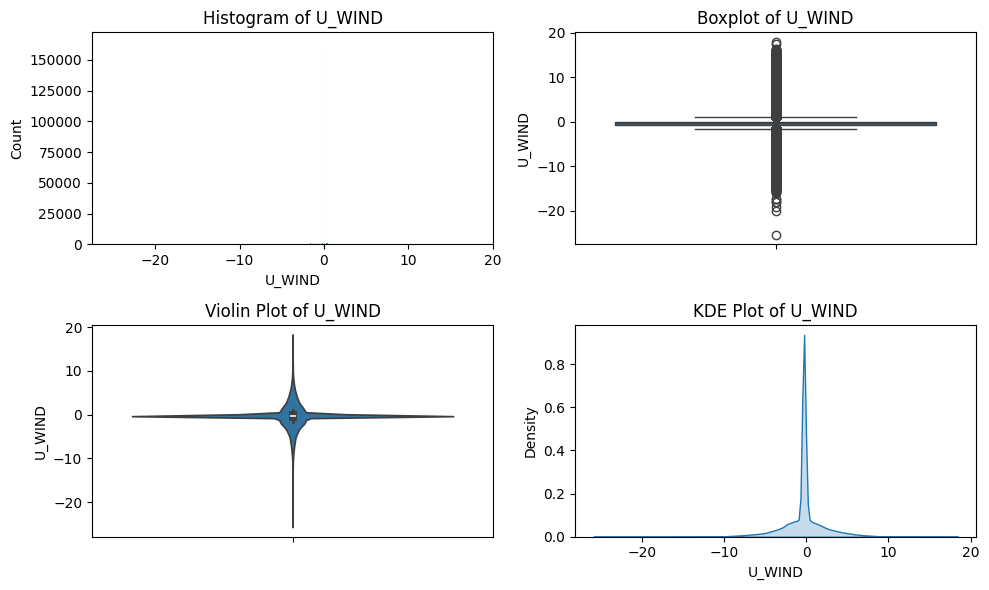

C:\Users\flt.DESKTOP-I2KQP96\AppData\Local\Temp\ipykernel_14440\3146580038.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column_name], shade=True)


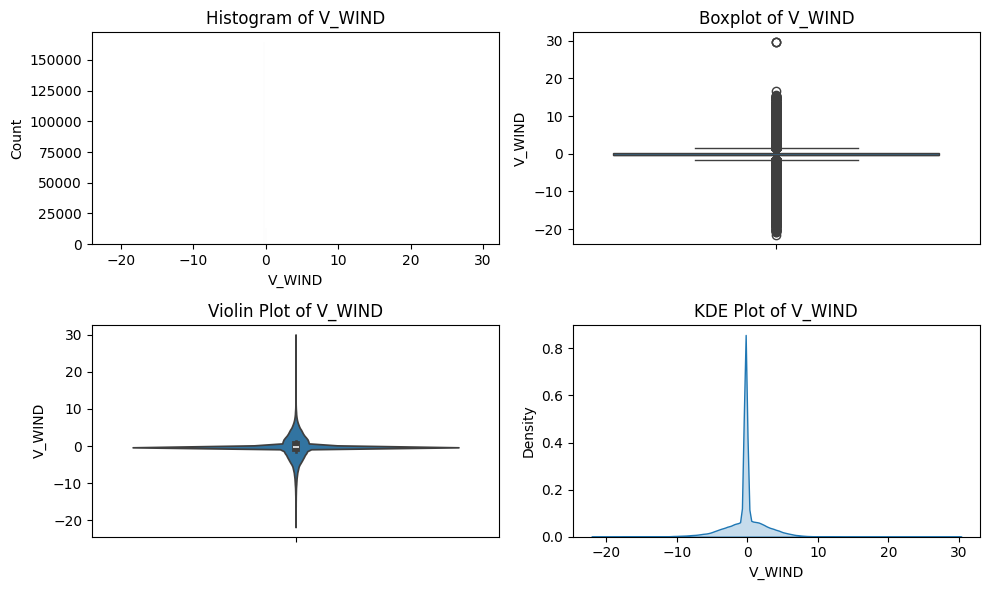

C:\Users\flt.DESKTOP-I2KQP96\AppData\Local\Temp\ipykernel_14440\3146580038.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column_name], shade=True)


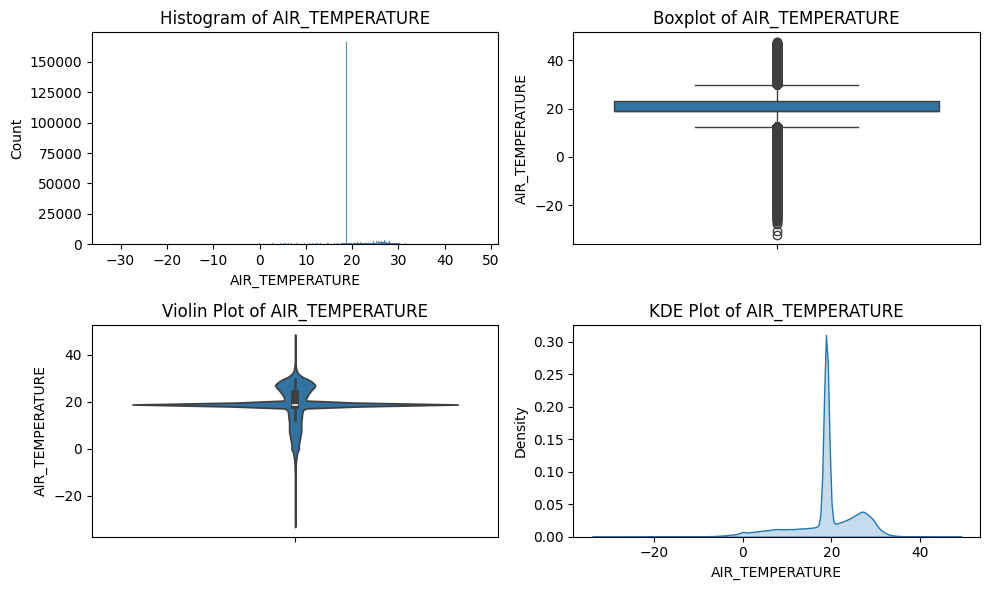

C:\Users\flt.DESKTOP-I2KQP96\AppData\Local\Temp\ipykernel_14440\3146580038.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column_name], shade=True)


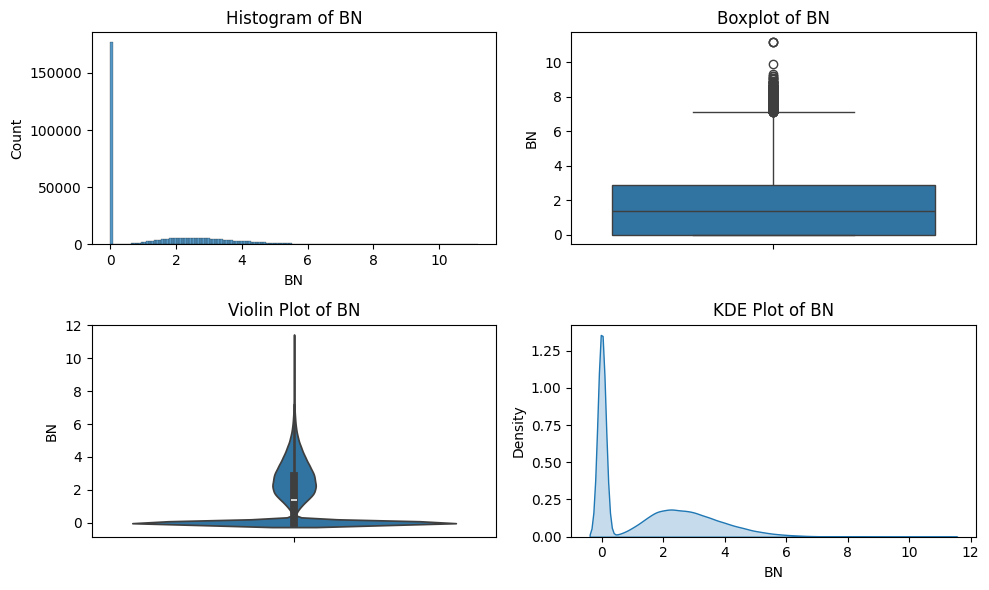

In [28]:
plot_u_wind(train, 'U_WIND')
plot_u_wind(train, 'V_WIND')
plot_u_wind(train, 'AIR_TEMPERATURE')
plot_u_wind(train, 'BN')

In [68]:
train.isnull().sum()

SAMPLE_ID             0
ARI_CO                0
ARI_PO                0
SHIP_TYPE_CATEGORY    0
DIST                  0
ATA                   0
ID                    0
BREADTH               1
BUILT                 0
DEADWEIGHT            0
DEPTH                 1
DRAUGHT               1
GT                    0
LENGTH                1
SHIPMANAGER           0
FLAG                  0
U_WIND                0
V_WIND                0
AIR_TEMPERATURE       0
BN                    0
ATA_LT                0
PORT_SIZE             0
CI_HOUR               0
dtype: int64

In [69]:
train = train.dropna()
train.isnull().sum()

SAMPLE_ID             0
ARI_CO                0
ARI_PO                0
SHIP_TYPE_CATEGORY    0
DIST                  0
ATA                   0
ID                    0
BREADTH               0
BUILT                 0
DEADWEIGHT            0
DEPTH                 0
DRAUGHT               0
GT                    0
LENGTH                0
SHIPMANAGER           0
FLAG                  0
U_WIND                0
V_WIND                0
AIR_TEMPERATURE       0
BN                    0
ATA_LT                0
PORT_SIZE             0
CI_HOUR               0
dtype: int64

### 상관관계(히트맵)

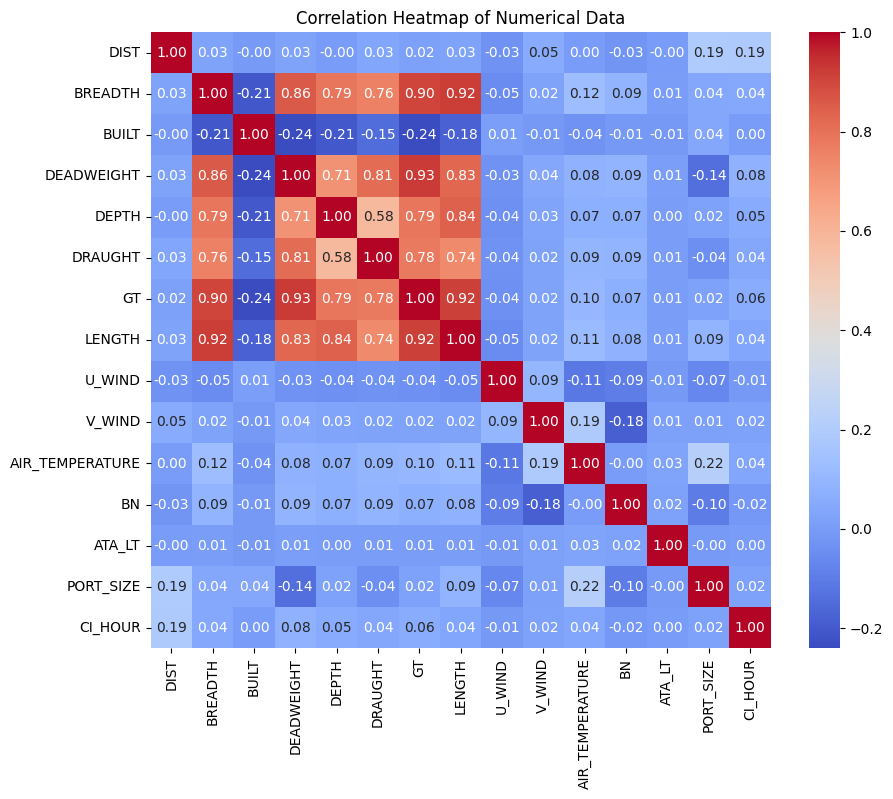

In [26]:
# 수치형 데이터만 선택
numerical_train = train.select_dtypes(include=[np.number])

# 상관 행렬 계산
correlation_matrix = numerical_train.corr()

# 히트맵으로 상관 관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Data')
plt.show()


### object 타입 다루기

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391938 entries, 0 to 391938
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SAMPLE_ID           391938 non-null  object 
 1   ARI_CO              391938 non-null  object 
 2   ARI_PO              391938 non-null  object 
 3   SHIP_TYPE_CATEGORY  391938 non-null  object 
 4   DIST                391938 non-null  float64
 5   ATA                 391938 non-null  object 
 6   ID                  391938 non-null  object 
 7   BREADTH             391938 non-null  float64
 8   BUILT               391938 non-null  int64  
 9   DEADWEIGHT          391938 non-null  int64  
 10  DEPTH               391938 non-null  float64
 11  DRAUGHT             391938 non-null  float64
 12  GT                  391938 non-null  int64  
 13  LENGTH              391938 non-null  float64
 14  SHIPMANAGER         391938 non-null  object 
 15  FLAG                391938 non-null  ob

In [40]:
train['ARI_CO'].value_counts() # 원핫 인코딩

ARI_CO
CN    141743
JP     52752
SG     43865
AU     32853
TW     32615
IN     16192
RU     14383
CA     10890
KR     10644
BR      9374
ID      5863
US      4420
UA      3363
LV      2140
MZ      2122
QA      1809
ZA      1667
VN      1581
TT      1188
PE       904
MY       856
CL       267
FI       257
VE        97
PH        93
Name: count, dtype: int64

In [42]:
train['ARI_PO'].value_counts() # 원핫 인코딩

ARI_PO
GIW5    43865
NGG6    29095
EKP8    27862
JWI3    24495
EUC8    22706
        ...  
QXE2       92
ZME5       38
ONW1       17
DIN2       14
RGT8        6
Name: count, Length: 103, dtype: int64

In [43]:
train['SHIP_TYPE_CATEGORY'].value_counts()

SHIP_TYPE_CATEGORY
Container    166315
Bulk         164301
Cargo         40804
Tanker        20518
Name: count, dtype: int64

In [44]:
train['ATA'].value_counts()

ATA
2022-01-31 14:59    56
2022-01-31 14:58    47
2022-01-31 14:56    32
2022-01-31 14:57    30
2022-01-31 14:54    26
                    ..
2021-03-30 11:29     1
2019-12-22 7:55      1
2018-11-13 14:37     1
2020-04-12 15:54     1
2015-06-08 23:30     1
Name: count, Length: 336608, dtype: int64

In [70]:
train['ATA'] = pd.to_datetime(train['ATA'])

# 년, 월, 일, 시, 분 컬럼 생성 및 할당
train['Year'] = train['ATA'].dt.year
train['Month'] = train['ATA'].dt.month
train['Day'] = train['ATA'].dt.day
train['Hour'] = train['ATA'].dt.hour
train['Minute'] = train['ATA'].dt.minute

# 결과 확인
train.head()

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR,Year,Month,Day,Hour,Minute
0,TRAIN_000000,SG,GIW5,Container,30.881018,2018-12-17 21:29:00,Z618338,30.0,24,24300,...,18.862968,0.000000,5,0.002615,3.450000,2018,12,17,21,29
1,TRAIN_000001,IN,UJM2,Bulk,0.000000,2014-09-23 06:59:00,X886125,30.0,13,35900,...,18.862968,0.000000,12,0.000217,0.000000,2014,9,23,6,59
2,TRAIN_000002,CN,EUC8,Container,0.000000,2015-02-03 22:00:00,T674582,50.0,12,146000,...,18.862968,0.000000,6,0.001614,0.000000,2015,2,3,22,0
3,TRAIN_000003,JP,ZAG4,Container,0.000000,2020-01-17 04:02:00,Y847238,20.0,18,6910,...,6.700000,2.629350,13,0.000356,0.000000,2020,1,17,4,2
4,TRAIN_000004,SG,GIW5,Container,27.037650,2020-01-26 07:51:00,A872328,50.0,10,116000,...,25.600000,2.495953,15,0.002615,253.554444,2020,1,26,7,51


In [45]:
train['ATA_LT'].value_counts()

ATA_LT
8     21331
10    19553
7     18759
9     18406
11    18366
12    18182
16    18084
14    17871
15    17690
18    17364
13    17093
17    16594
22    16393
20    16372
19    16332
21    15184
23    15164
0     15049
6     14036
2     13878
1     13809
3     12800
4     12288
5     11340
Name: count, dtype: int64

In [55]:
"""
 6   ID                  391938 non-null  object 
 14  SHIPMANAGER         391938 non-null  object 
 15  FLAG                391938 non-null  object 
"""
train['ID'].value_counts() # 25027
train['SHIPMANAGER'].value_counts() # 6565
train['FLAG'].value_counts() # 125 원핫인코딩

ID
E231315    776
J182342    510
X345112    502
W358545    501
T184327    494
          ... 
S824142      1
H517528      1
H783638      1
V741367      1
D222868      1
Name: count, Length: 25027, dtype: int64

In [57]:
print(train['ID'].value_counts())

ID
E231315    776
J182342    510
X345112    502
W358545    501
T184327    494
          ... 
S824142      1
H517528      1
H783638      1
V741367      1
D222868      1
Name: count, Length: 25027, dtype: int64


In [ ]:
# 선박 식별변호, 선박의 기장이 누군지에 따라 분명히 지연시간 차이가 날 것이다.
# 그러므로 차원이 좀 많이 늘어나더라도 원핫인코딩에 포함시키는 게 나을듯 하다.

### 원핫인코딩

In [71]:
drop_columns = ['SAMPLE_ID', 'ATA', 'ID', 'SHIPMANAGER']
train = train.drop(columns=drop_columns)

In [73]:
train = pd.get_dummies(train)

In [74]:
train.shape

(391938, 277)

In [75]:
x = train.drop(columns=['CI_HOUR'])
y = train['CI_HOUR']

## 학습

In [76]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x,y)

RandomForestRegressor()

In [78]:
import pickle
# 모델을 파일로 저장
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# 저장된 모델 불러오기
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# 불러온 모델 사용
# 예를 들어, 예측을 수행할 수 있음
# predictions = loaded_model.predict(X_new)


## 제출

In [103]:
test.head()

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,GT,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE
0,TEST_000000,SG,GIW5,Container,1.826589,2020-06-18 11:58,K322654,50.0,18,117000,...,109000,340.0,KQMD74,Panama,0.37,1.63,27.1,1.587063,19,0.002615
1,TEST_000001,CN,WEY7,Cargo,25.399386,2021-05-26 22:20,E376681,10.0,13,3810,...,2560,80.0,LBYS27,Belize,-2.79,-2.33,14.2,2.663972,6,0.001028
2,TEST_000002,CN,NGG6,Container,111.079467,2019-12-16 0:09,F811111,20.0,26,10900,...,8440,140.0,EKFV15,Singapore,0.04,-4.91,9.3,3.255315,8,0.001743
3,TEST_000003,CA,FFM2,Bulk,9.175258,2015-11-16 5:30,A737561,30.0,9,55800,...,31500,190.0,MASW32,Panama,NaN,NaN,NaN,NaN,2,0.000182
4,TEST_000004,JP,QYY1,Container,0.000000,2018-10-24 1:11,A827175,30.0,19,39800,...,33000,220.0,SIEL54,Liberia,NaN,NaN,NaN,NaN,10,0.000552


In [104]:
test.isnull().sum()

SAMPLE_ID                 0
ARI_CO                    0
ARI_PO                    0
SHIP_TYPE_CATEGORY        0
DIST                      0
ATA                       0
ID                        0
BREADTH                   0
BUILT                     0
DEADWEIGHT                0
DEPTH                     0
DRAUGHT                   0
GT                        0
LENGTH                    0
SHIPMANAGER               0
FLAG                      0
U_WIND                91725
V_WIND                91725
AIR_TEMPERATURE       92246
BN                    91725
ATA_LT                    0
PORT_SIZE                 0
dtype: int64

In [105]:
# U_WIND, V_WIND, AIR_TEMPERATURE의 결측치는 평균값으로 채워줍니다.
test['U_WIND'].fillna(test['U_WIND'].mean(), inplace=True)
test['V_WIND'].fillna(test['V_WIND'].mean(), inplace=True)
test['AIR_TEMPERATURE'].fillna(test['AIR_TEMPERATURE'].mean(), inplace=True)

# BN의 결측치는 0으로 채워줍니다.
test['BN'].fillna(0, inplace=True)

# 결과를 출력합니다.
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220491 entries, 0 to 220490
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SAMPLE_ID           220491 non-null  object 
 1   ARI_CO              220491 non-null  object 
 2   ARI_PO              220491 non-null  object 
 3   SHIP_TYPE_CATEGORY  220491 non-null  object 
 4   DIST                220491 non-null  float64
 5   ATA                 220491 non-null  object 
 6   ID                  220491 non-null  object 
 7   BREADTH             220491 non-null  float64
 8   BUILT               220491 non-null  int64  
 9   DEADWEIGHT          220491 non-null  int64  
 10  DEPTH               220491 non-null  float64
 11  DRAUGHT             220491 non-null  float64
 12  GT                  220491 non-null  int64  
 13  LENGTH              220491 non-null  float64
 14  SHIPMANAGER         220491 non-null  object 
 15  FLAG                220491 non-nul

In [106]:
test['ATA'] = pd.to_datetime(test['ATA'])

# 년, 월, 일, 시, 분 컬럼 생성 및 할당
test['Year'] = test['ATA'].dt.year
test['Month'] = test['ATA'].dt.month
test['Day'] = test['ATA'].dt.day
test['Hour'] = test['ATA'].dt.hour
test['Minute'] = test['ATA'].dt.minute

# 결과 확인
test.head()

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,Year,Month,Day,Hour,Minute
0,TEST_000000,SG,GIW5,Container,1.826589,2020-06-18 11:58:00,K322654,50.0,18,117000,...,1.630000,27.100000,1.587063,19,0.002615,2020,6,18,11,58
1,TEST_000001,CN,WEY7,Cargo,25.399386,2021-05-26 22:20:00,E376681,10.0,13,3810,...,-2.330000,14.200000,2.663972,6,0.001028,2021,5,26,22,20
2,TEST_000002,CN,NGG6,Container,111.079467,2019-12-16 00:09:00,F811111,20.0,26,10900,...,-4.910000,9.300000,3.255315,8,0.001743,2019,12,16,0,9
3,TEST_000003,CA,FFM2,Bulk,9.175258,2015-11-16 05:30:00,A737561,30.0,9,55800,...,-0.271314,18.908746,0.000000,2,0.000182,2015,11,16,5,30
4,TEST_000004,JP,QYY1,Container,0.000000,2018-10-24 01:11:00,A827175,30.0,19,39800,...,-0.271314,18.908746,0.000000,10,0.000552,2018,10,24,1,11


In [107]:
drop_columns = ['SAMPLE_ID', 'ATA', 'ID', 'SHIPMANAGER']
test = test.drop(columns=drop_columns)
test = pd.get_dummies(test)

In [108]:
test.shape

(220491, 269)

In [109]:
"""
지금 train 데이터에 get_dummies를 했고, test 데이터에 get_dummies를 하며 원핫인코딩을 했는데,
train의 shape는 (220491, 276), test의 shape는 (220491, 269)야.
train의 shape와 맞게 test에도 컬럼을 추가해야하는데, 전체 코드를 보여줘
"""

# train 세트에 있는 열을 확인하고 test 세트에 없는 열 추가
for column in x.columns:
    if column not in test.columns:
        test[column] = 0

test.to_csv('test.csv')

In [112]:
test.shape

(220491, 277)

In [113]:
for column in test.columns:
    if column not in x.columns:
        print(column)

FLAG_Gambia


In [114]:
test = test.drop(columns=['FLAG_Gambia'])

In [123]:
test.shape

(220491, 276)

In [124]:
"""
"train"의 컬럼 순서는 그대로 있고, "test"의 컬럼 순서를 train의 컬럼 순서와 똑같이 정렬하려면 어떻게 해야해?
"""
test_reordered = test.reindex(columns=x.columns, fill_value=0)
test_reordered.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220491 entries, 0 to 220490
Columns: 276 entries, DIST to FLAG_Vietnam
dtypes: bool(249), float64(10), int32(5), int64(12)
memory usage: 93.6 MB


In [125]:
pred = model.predict(test_reordered)

In [127]:
sample_submission['CI_HOUR'] = pred

In [130]:
sample_submission.to_csv('first_submission.csv', index=False)

### 특성 중요도 평가

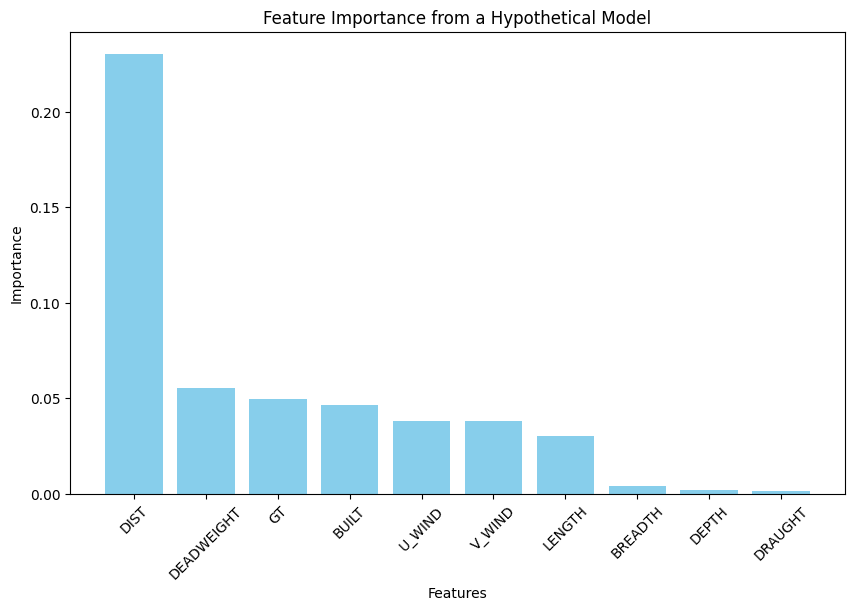

In [151]:
"""
model의 feature Importance를 뽑아
각 feature Importance의 값에 대한 그래프 그려줘
feature는 feature1, feature2, ..., feature9 말고, 원본 컬럼의 이름이면 좋겠어.
"""

# 특성 중요도 가져오기
feature_importance = model.feature_importances_[:10]

# Assuming a hypothetical model with 10 features
feature_names = test.columns

# Sorting the features by importance
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importance = feature_importance[sorted_indices]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importance, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance from a Hypothetical Model')
plt.xticks(rotation=45)
plt.show()

In [152]:
# dist : 정박지 접안지 사이 거리
# deadweight : 선박의 재화중량톤수
# GT : 용적톤수의 값

# built : 선박의 연령
# v_wind, u_wind : 바람

# depth : 선박의 깊이
# draught : 흘수 높이
# breadth : 선박의 폭
# length : 선박의 길이


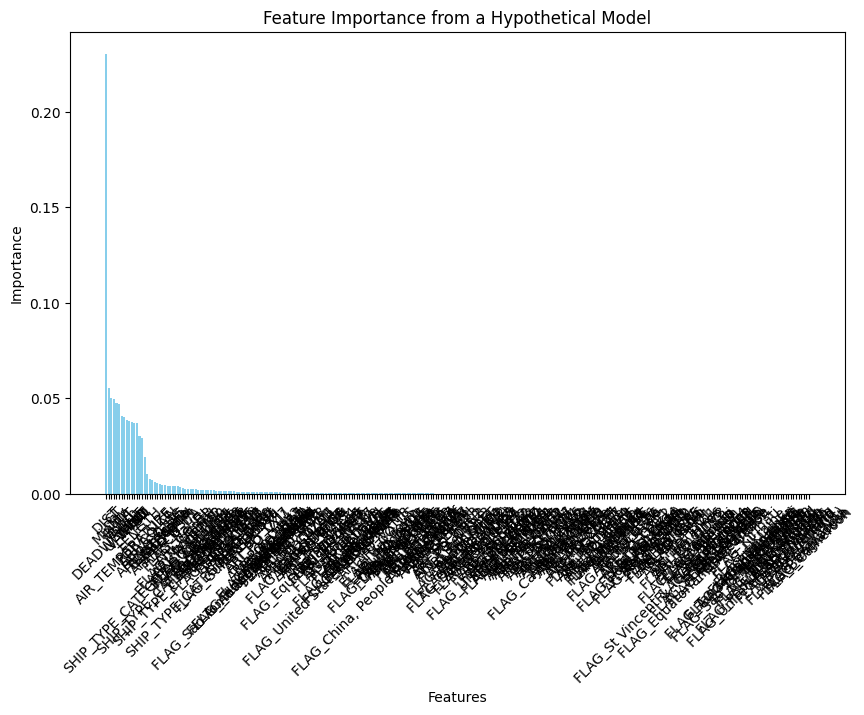

In [146]:
# 특성 중요도 가져오기
feature_importances = model.feature_importances_

# Assuming a hypothetical model with 10 features
feature_names = test.columns

# Sorting the features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importance = feature_importances[sorted_indices]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importance, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance from a Hypothetical Model')
plt.xticks(rotation=45)
plt.show()

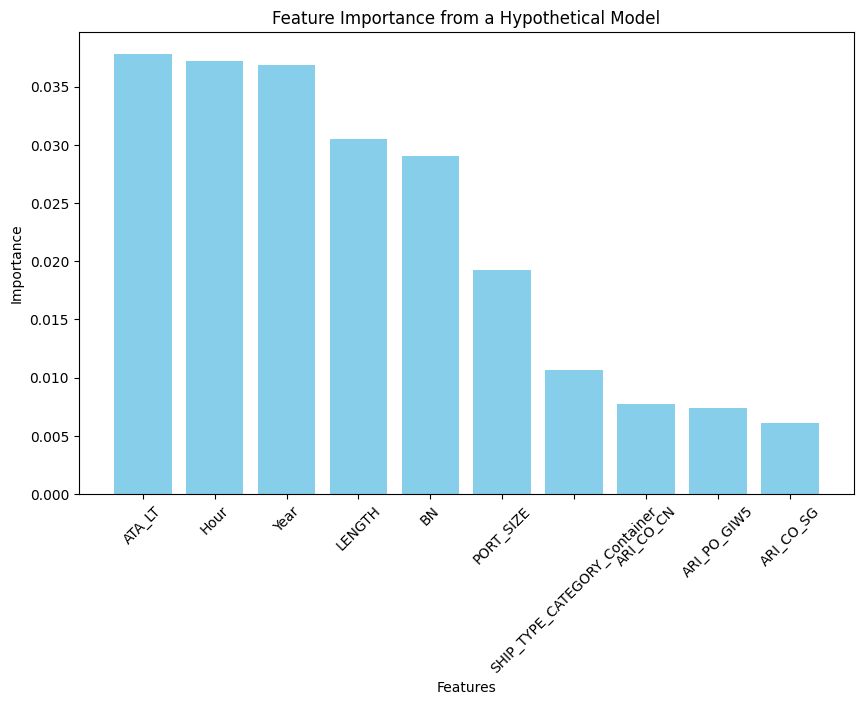

In [149]:
# 특성 중요도 가져오기
feature_importances = model.feature_importances_

# Assuming a hypothetical model with 10 features
feature_names = test.columns

# Sorting the features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importance = feature_importances[sorted_indices]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_features[10:20], sorted_importance[10:20], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance from a Hypothetical Model')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 특성 중요도 가져오기
feature_importances = model.feature_importances_

# Assuming a hypothetical model with 10 features
feature_names = test.columns

# Sorting the features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importance = feature_importances[sorted_indices]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_features[10:20], sorted_importance[10:20], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance from a Hypothetical Model')
plt.xticks(rotation=45)
plt.show()

### 발전

In [ ]:
# 선장, 배의 종류에 따라서 분명 차이가 있을 것이다.
# 컴퓨터 성능 때문에 학습을 못시키므로, 효과적으로 학습할 방법을 찾아야 할 듯 하다.
# 1. 배 선박 id의 첫글자만 딴다, 선장 id의 첫글자만 딴 후 원핫인코딩한다.